# Compare openings and their jobs using  row_data.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data/new_release/raw_data.csv', low_memory=False)
df_raw_baseline = pd.read_csv('/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data/baseline/raw_data.csv', low_memory=False)



In [3]:
df_raw_baseline

,startTime,endTime,sampleLabel,responseTime,isSuccsessful,isFailed,responseCode
0,1716030270808,1716030270879,GET_mainPage,71,1,0,200
1,1716030270784,1716030270881,GET_mainPage,97,1,0,200
2,1716030270797,1716030270896,GET_mainPage,99,1,0,200
3,1716030270818,1716030270896,GET_mainPage,78,1,0,200
4,1716030270826,1716030270917,GET_mainPage,91,1,0,200
...,...,...,...,...,...,...,...
49995,1716030316686,1716030316784,POST_card,98,1,0,200
49996,1716030316715,1716030316793,POST_confirm,78,1,0,200
49997,1716030316771,1716030316872,POST_card,101,1,0,200
49998,1716030316784,1716030316881,POST_confirm,97,1,0,200


## Convert to Datetime

In [4]:
df_raw["startTime"] = pd.to_datetime(df_raw["startTime"], unit='ms')
df_raw_baseline["startTime"] = pd.to_datetime(df_raw_baseline["startTime"], unit='ms')

## Filtered by label Operation

In [5]:
filtered_df_raw = df_raw[df_raw['sampleLabel'] == 'POST_confirm']
filtered_df_raw_baseline = df_raw_baseline[df_raw_baseline['sampleLabel'] == 'POST_confirm']

In [6]:
filtered_df_raw

,startTime,endTime,sampleLabel,responseTime,isSuccsessful,isFailed,responseCode
328,2024-05-18 11:10:55.909,1716030656610,POST_confirm,701,1,0,200
358,2024-05-18 11:10:56.002,1716030656693,POST_confirm,691,1,0,200
364,2024-05-18 11:10:56.103,1716030656710,POST_confirm,607,1,0,200
365,2024-05-18 11:10:56.197,1716030656713,POST_confirm,516,1,0,200
367,2024-05-18 11:10:55.973,1716030656715,POST_confirm,742,1,0,200
...,...,...,...,...,...,...,...
4991,2024-05-18 11:11:12.562,1716030674434,POST_confirm,1872,1,0,200
4994,2024-05-18 11:11:12.597,1716030674572,POST_confirm,1975,1,0,200
4995,2024-05-18 11:11:13.645,1716030674590,POST_confirm,945,1,0,200
4998,2024-05-18 11:11:14.065,1716030675832,POST_confirm,1767,1,0,200


## Align timestamps

In [7]:
min_timestamp_baseline = filtered_df_raw_baseline['startTime'].min()
min_timestamp = filtered_df_raw['startTime'].min()
offset = min_timestamp - min_timestamp_baseline
#filtered_df_raw['endTime'] -= offset
filtered_df_raw.loc[:,'startTime'] -= offset

## Plot

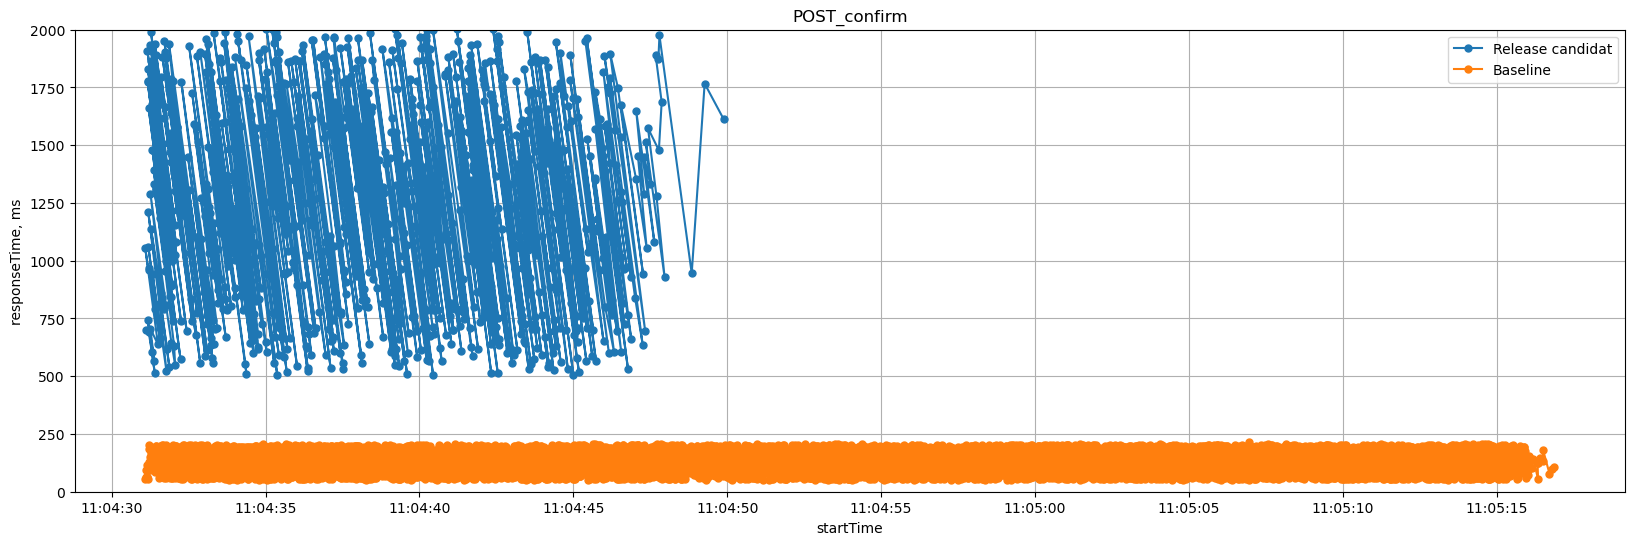

In [8]:
plt.figure(figsize=(20,6))
plt.ylim(0, 2000)

plt.plot(filtered_df_raw['startTime'], filtered_df_raw['responseTime'],marker='o',markersize=5, label='Release candidat')
plt.plot(filtered_df_raw_baseline['startTime'], filtered_df_raw_baseline['responseTime'],marker='o',markersize=5,label='Baseline')
plt.legend()

plt.xlabel('startTime')
plt.ylabel('responseTime, ms')
plt.title('POST_confirm')
plt.grid(True)
plt.show()

## Filtered by GET_mainPage

In [9]:
filtered_df_raw_pr = df_raw[df_raw['sampleLabel'] == 'GET_mainPage']
filtered_df_raw_baseline_pr = df_raw_baseline[df_raw_baseline['sampleLabel'] == 'GET_mainPage']

In [17]:
min_timestamp_baseline = filtered_df_raw_baseline_pr['startTime'].min()
min_timestamp = filtered_df_raw_pr['startTime'].min()
offset = min_timestamp - min_timestamp_baseline
#filtered_df_raw['endTime'] -= offset
filtered_df_raw_pr.loc[:,'startTime'] -= offset

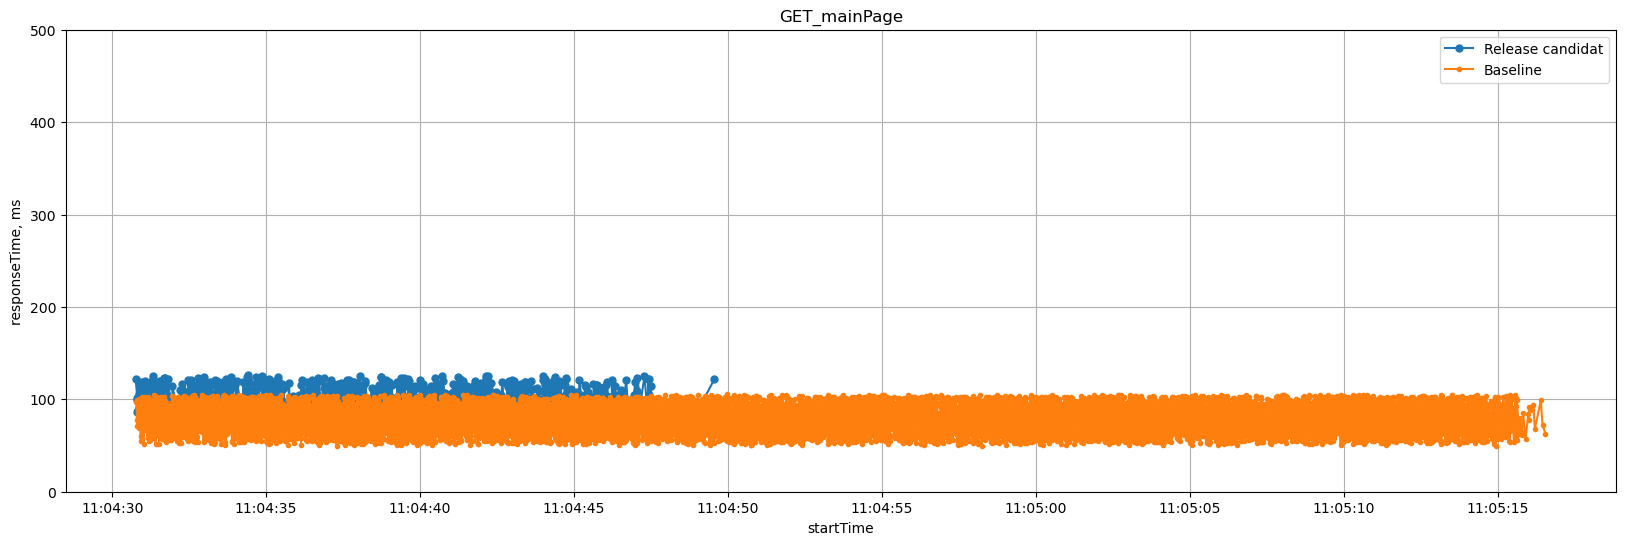

In [18]:
plt.figure(figsize=(20,6))
plt.ylim(0, 500)

plt.plot(filtered_df_raw_pr['startTime'], filtered_df_raw_pr['responseTime'],marker='o',markersize=5, label='Release candidat')
plt.plot(filtered_df_raw_baseline_pr['startTime'], filtered_df_raw_baseline_pr['responseTime'],marker='o',markersize=3,label='Baseline')
plt.legend()

plt.xlabel('startTime')
plt.ylabel('responseTime, ms')
plt.title('GET_mainPage')
plt.grid(True)
plt.show()